In [112]:
# Data Processing
import sklearn as sk
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# Import train_test_split function
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

df = []
# Read the excel file as a pandas DataFrame
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='AAPL'))
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='GE'))
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='GOOGL'))
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='GS'))
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='IBM'))
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='MSFT'))
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='TSLA'))
df.append(pd.read_excel(
    'Technical_Indicators-DataSet_AI_Project.xlsx', sheet_name='AMZN'))

# --------------------------------------------------------------------------------------------------------------

# Convert the DataFrame to a numpy array and transpose it to have the features as columns
data = []
x_train = []
y_train = []

for i in range(8):
    data.append(np.array(df[i]))
    # Get the input features (x_train) by selecting the first 4 columns of the transposed array
    x_train.append(data[i])
    # Transpose x_train to have the features as columns again
    x_train[i] = np.transpose(x_train[i])
    lenColumn = len(x_train[i])
    #print(lenColumn)
    x_train[i] = (x_train[i])[5:len(x_train[i])-1]
    x_train[i] = np.transpose(x_train[i])

    # Transpose y_train to have a single column of output values
    y_train.append(np.transpose(data[i]))
    # Get the output variable (y_train) by selecting the last column of the transposed array
    y_train[i] = (y_train[i])[lenColumn-1:lenColumn]
    y_train[i] = np.transpose(y_train[i])
    y_train[i] = y_train[i].ravel()
    #print("")
    #print((y_train[i]))
    #print("")



In [113]:
X_train, X_test, Y_train, Y_test =[],[],[],[]
# Split dataset into training set and test set
for i in range(8):
    a, b, c, d = train_test_split(x_train[i], y_train[i], test_size=0.15,random_state=109) # 70% training and 30% test
    X_train.append(a)
    X_test.append(b)
    Y_train.append(c)
    Y_test.append(d)
    '''
    print("X_train:",len(X_train[i]))
    print("X_test:",len(X_test[i]))
    print("Y_train:",len(Y_train[i]))
    print("Y_test:",len(Y_test[i]))
    print("")
    '''

In [114]:
# Create a svm Classifier
clf = svm.SVC(kernel='rbf', probability=True, random_state=42)
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=20)
ada = AdaBoostClassifier(n_estimators=10)
gbc = GradientBoostingClassifier(n_estimators=100)
ensemble = VotingClassifier(estimators=[('svm', clf), ('knn', knn), (
    'rf', rf), ('dt', dt), ('ada', ada), ('gbc', gbc)], voting='hard')

print("")

PredictedVal=[]
for i in range(8):
    #Train the model using the training sets
    print("Ensemble:",i+1)
    ensemble.fit(X_train[i],Y_train[i])
    #Predict the response for test dataset
    PredictedVal.append(ensemble.predict(X_test[i]))
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:",round(sk.metrics.accuracy_score(Y_test[i], PredictedVal[i])*100,2),"%")
    print("")


Ensemble: 1
Accuracy: 81.25 %

Ensemble: 2
Accuracy: 83.98 %

Ensemble: 3
Accuracy: 83.09 %

Ensemble: 4
Accuracy: 83.04 %

Ensemble: 5
Accuracy: 86.38 %

Ensemble: 6
Accuracy: 84.46 %

Ensemble: 7
Accuracy: 83.06 %

Ensemble: 8
Accuracy: 83.83 %



In [115]:
dfTest = []
# Read the excel file as a pandas DataFrame
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='AAPL'))
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='GE'))
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='GOOGL'))
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='GS'))
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='IBM'))
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='MSFT'))
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='TSLA'))
dfTest.append(pd.read_excel(
    'TestStockDataFor(2018-2020).xlsx', sheet_name='AMZN'))

# --------------------------------------------------------------------------------------------------------------

# Convert the DataFrame to a numpy array and transpose it to have the features as columns
data = []
x_test = []
closePrice = []
datee=[]

for i in range(8):
    data.append(np.array(dfTest[i]))
    # Get the input features (x_train) by selecting the first 4 columns of the transposed array
    x_test.append(data[i])
    # Transpose x_train to have the features as columns again
    x_test[i] = np.transpose(x_test[i])
    closePrice.append((x_test[i])[1:2])
    datee.append((x_test[i])[0:1])
    closePrice[i] = np.transpose(closePrice[i])
    datee[i] = np.transpose(datee[i])
    lenColumn = len(x_test[i])
    x_test[i] = (x_test[i])[5:len(x_test[i])-1]
    x_test[i] = np.transpose(x_test[i])


In [116]:
# Testing for 2018-2020
PredictedValTest = []
for i in range(8):
    PredictedValTest.append(ensemble.predict(x_test[i]))
    print("Number of Values:", len(PredictedValTest[i]))
    print("---------------------------")


Number of Values: 659
---------------------------
Number of Values: 659
---------------------------
Number of Values: 659
---------------------------
Number of Values: 659
---------------------------
Number of Values: 659
---------------------------
Number of Values: 659
---------------------------
Number of Values: 659
---------------------------
Number of Values: 659
---------------------------


In [117]:
import functions as f
import array

d = 2
Investment = 1000
# APPL,GE,GOOGL,GS,IBM,MSFT,TSLA,AMZN
MarketCap = [2710, 108, 1500, 106.22, 111.54, 2300, 526.36, 1130]
TotalMC = f._sum(MarketCap)
# print(TotalMC)
TestAmount = []
OriginalTotalAmount = 0

for i in range(8):
    formula = MarketCap[i]/TotalMC*Investment
    TestAmount.append(round(formula, 3))
    # print("Stock",i+1,TestAmount[i])

TestShares = [0, 0, 0, 0, 0, 0, 0, 0]
OriginalShares = [0, 0, 0, 0, 0, 0, 0, 0]
Y_Data = []
combinedYData = []
# Set the desired length of the array
n = math.floor(len(PredictedValTest[i])/d)
# Create an array of integers (type code 'i') with n elements initialized to 0
my_array = array.array('i', [0] * n)
my_stock_total = array.array('i', [0]*n)

for i in range(8):
    OriginalShares[i] = TestAmount[i]/(closePrice[i])[0]
    # print(OriginalShares[i])

for i in range(len(PredictedValTest)):  # len(PredictedValTest)
    # len(PredictedValTest[i])
    for j in range(math.floor(len(PredictedValTest[i])/d)):
        if (PredictedValTest[i])[j] == "Buy" and TestAmount[i] != 0:
            TestAmount[i] = TestAmount[i]*(99.25/100)  # Fee of 0.75%
            TestShares[i] = TestAmount[i]/(closePrice[i])[j]
            # print('TestShares', TestShares[i])
            TestAmount[i] = 0
        elif (PredictedValTest[i])[j] == "Sell" and TestShares[i] != 0:
            TestAmount[i] = TestShares[i]*(closePrice[i])[j]
            TestAmount[i] = TestAmount[i]*(99.25/100)  # Fee of 0.75%
            # print('TestAmount', TestAmount[i])
            TestShares[i] = 0

        if TestAmount[i] == 0:
            Y_Data.append(TestShares[i]*(closePrice[i])[j])
        elif TestShares[i] == 0:
            Y_Data.append(TestAmount[i])

for i in range(8):
    my_array = Y_Data[math.floor(
        len(PredictedValTest[i])/d) * i:math.floor(len(PredictedValTest[i])/d)*(i+1)]
    my_array = np.array(my_array)
    my_stock_total = np.add(my_stock_total, my_array)

    if TestAmount[i] == 0:
        TestAmount[i] = TestShares[i] * \
            (closePrice[i])[len(PredictedValTest[i])-1]

    print("Final Test Amount:", i+1, TestAmount[i])
    print("Original Amount", i+1, OriginalShares[i] *
          (closePrice[i])[math.floor(len(PredictedValTest[i])/d)-1])
    OriginalTotalAmount = OriginalTotalAmount + \
        (OriginalShares[i] * (closePrice[i])
         [math.floor(len(PredictedValTest[i])/d)-1])
    print("")


Final Test Amount: 1 [480.1994653017889]
Original Amount 1 [396.41338438090594]

Final Test Amount: 2 [35.390086445067865]
Original Amount 2 [7.220642550582465]

Final Test Amount: 3 [322.24947594215985]
Original Amount 3 [213.1292796528081]

Final Test Amount: 4 [14.994646190836436]
Original Amount 4 [10.026528283485044]

Final Test Amount: 5 [11.251227023058401]
Original Amount 5 [12.639394307149162]

Final Test Amount: 6 [352.42207874443324]
Original Amount 6 [404.1203832710618]

Final Test Amount: 7 [222.8611031785608]
Original Amount 7 [52.41650865384616]

Final Test Amount: 8 [383.0997355708356]
Original Amount 8 [218.5581271331058]



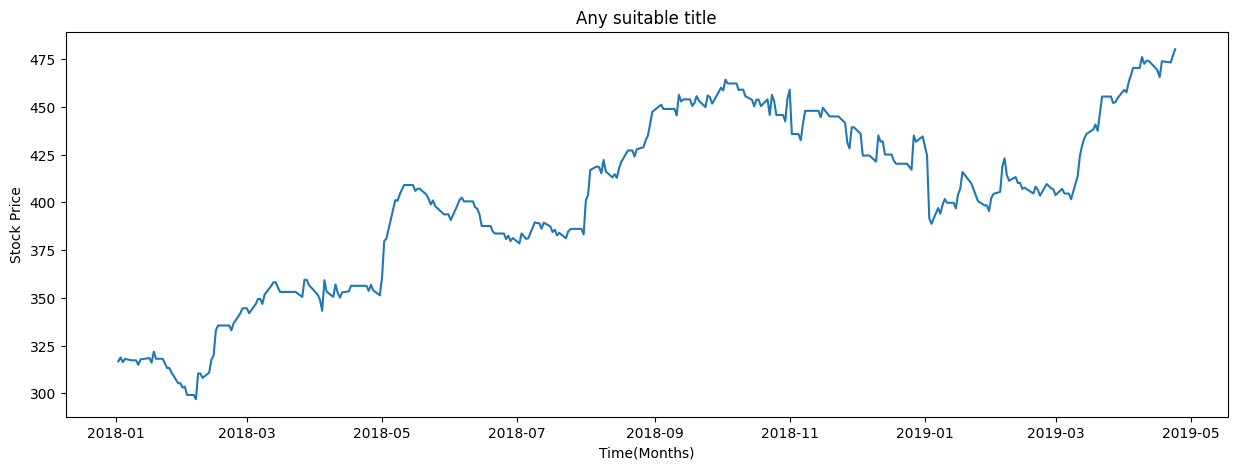

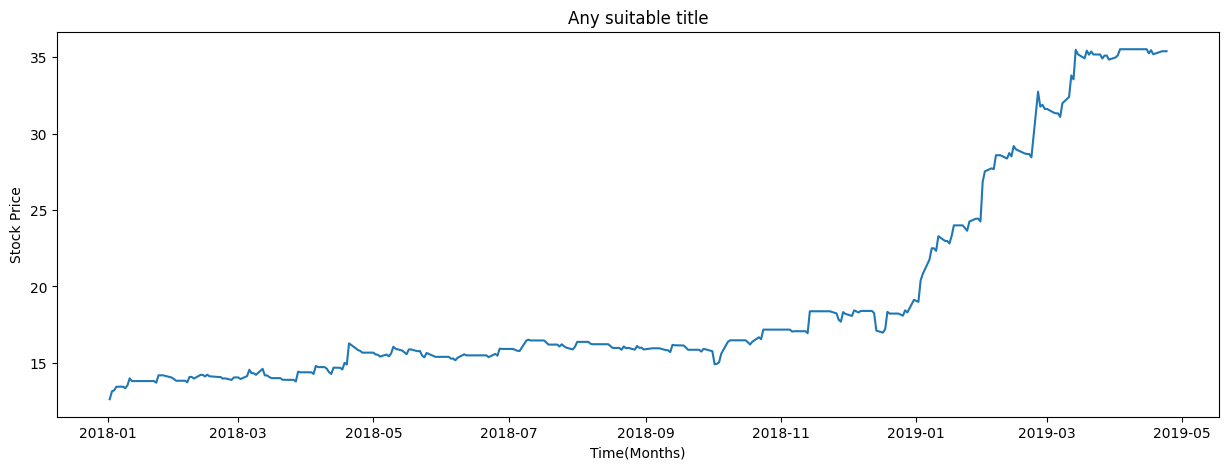

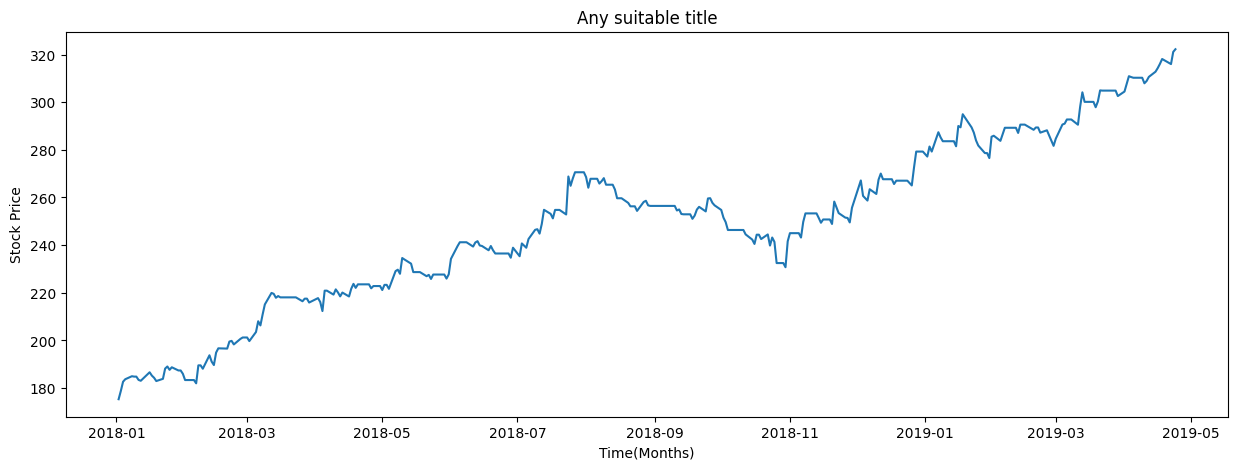

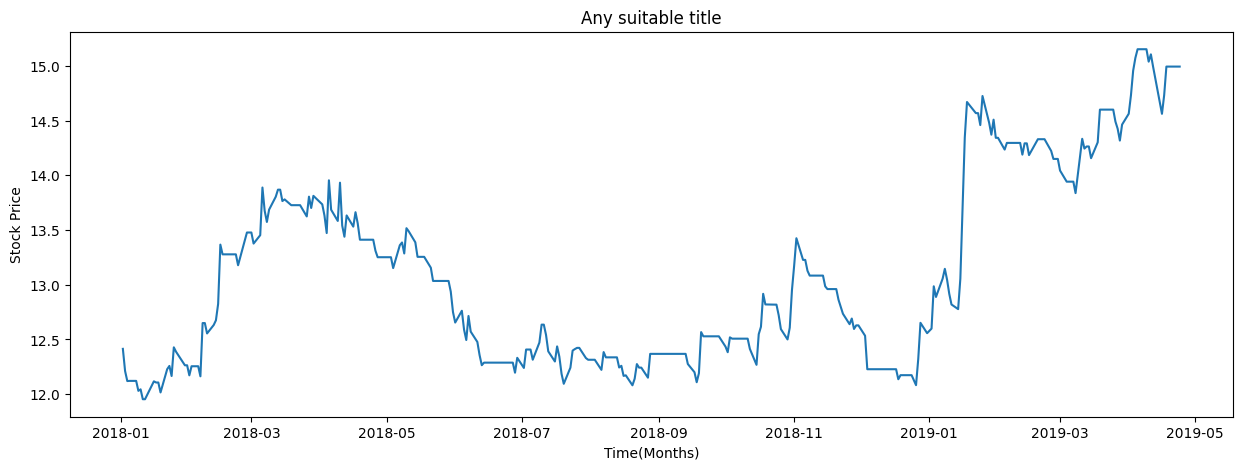

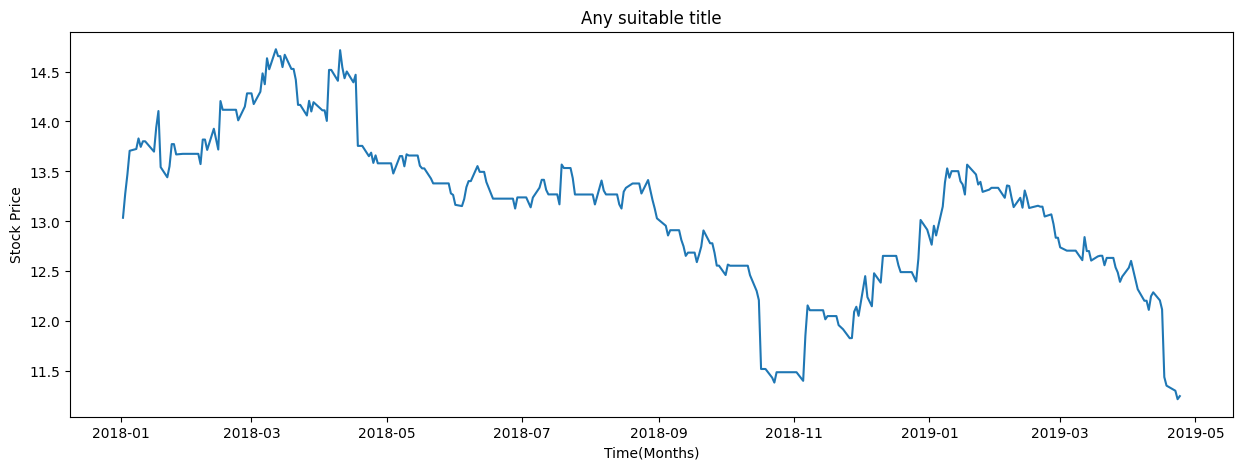

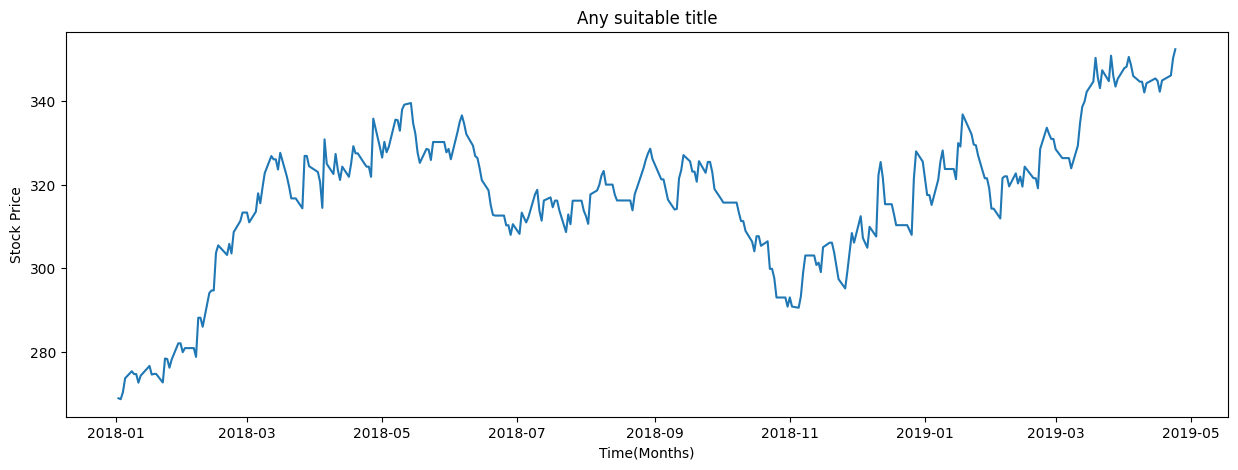

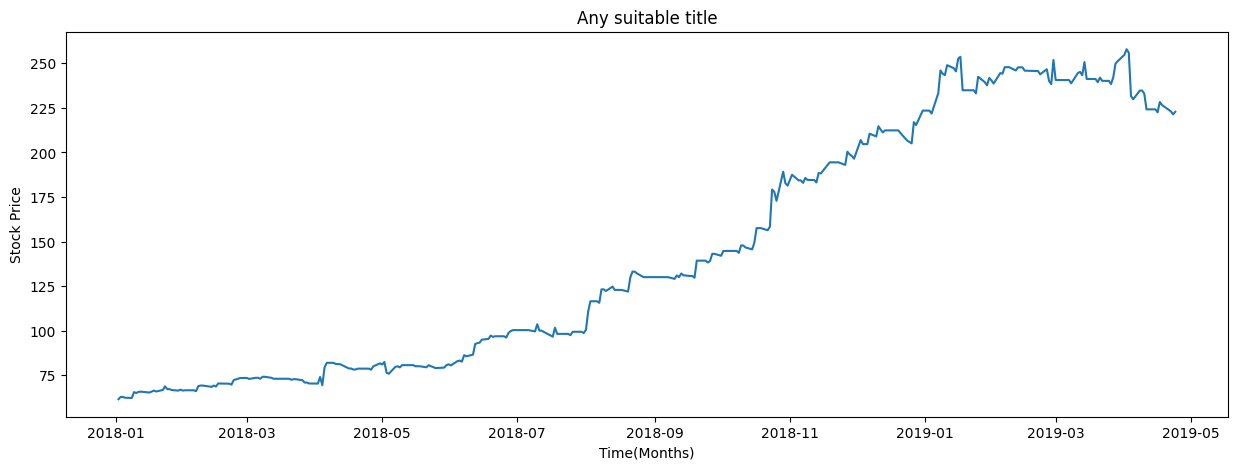

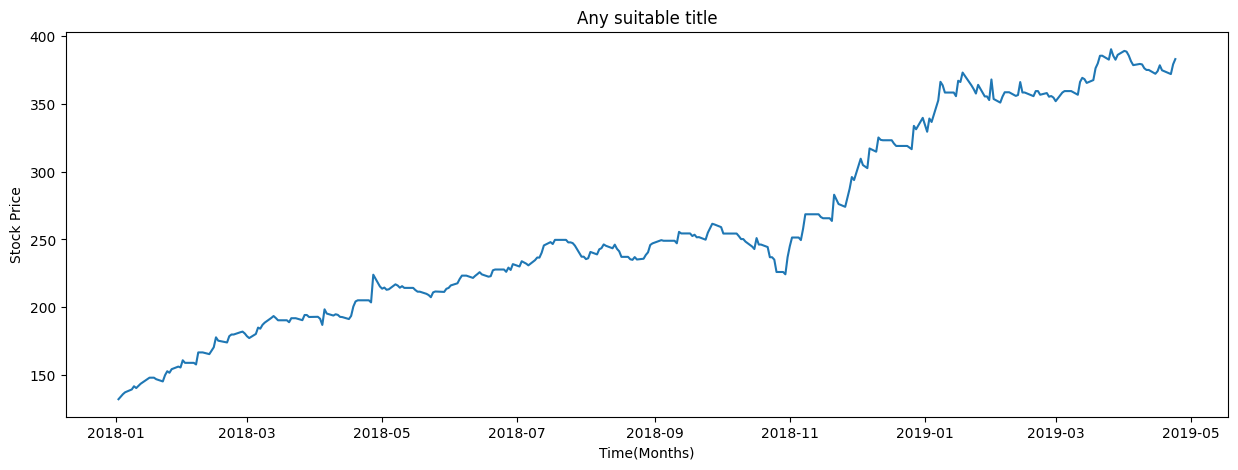

In [118]:
for i in range(8):
    # Define X and Y variable data
    x = (datee[i])[0:math.floor(len(PredictedValTest[i])/d)]
    y = Y_Data[math.floor(len(PredictedValTest[i])/d)*i:math.floor(len(PredictedValTest[i])/d)*(i+1)]
    #print(len(x),len(y))

    # plotting a line plot after changing it's width and height
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(5)

    plt.plot(x, y)
    plt.xlabel("Time(Months)")  # add X-axis label
    plt.ylabel("Stock Price")  # add Y-axis label
    plt.title("Any suitable title")  # add title
    plt.show()

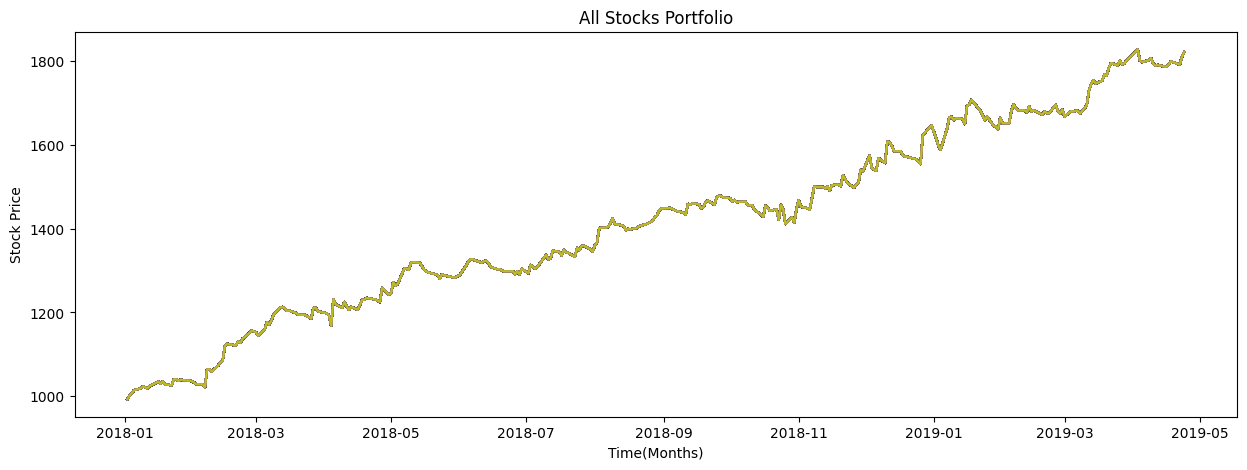

In [119]:
# Define X and Y variable data
x = (datee[i])[0:math.floor(len(PredictedValTest[i])/d)]
y = my_stock_total
# print(len(x),len(y))

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(x, y)
plt.xlabel("Time(Months)")  # add X-axis label
plt.ylabel("Stock Price")  # add Y-axis label
plt.title("All Stocks Portfolio")  # add title
plt.show()


In [120]:
print("Total Produced By Stocks(Normal Trade):$",OriginalTotalAmount[0])
print("Total Produced By Stocks(AI Trade):$",my_stock_total[len(my_stock_total)-1][0])
diff=((my_stock_total[len(my_stock_total)-1][0])-(OriginalTotalAmount[0]))/((OriginalTotalAmount[0]))*100
print("Difference In Performance:",diff,"%")

Total Produced By Stocks(Normal Trade):$ 1314.5242482329445
Total Produced By Stocks(AI Trade):$ 1822.4678183967412
Difference In Performance: 38.64086728309518 %
